# Implementation of the Bayesian Network

### Geographical representation of the Bayesian Network

In [67]:
#import libraries for graph construction and plotting
import pandas as pd
!pip install networkx
!pip install pgmpy
import networkx as nx 
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


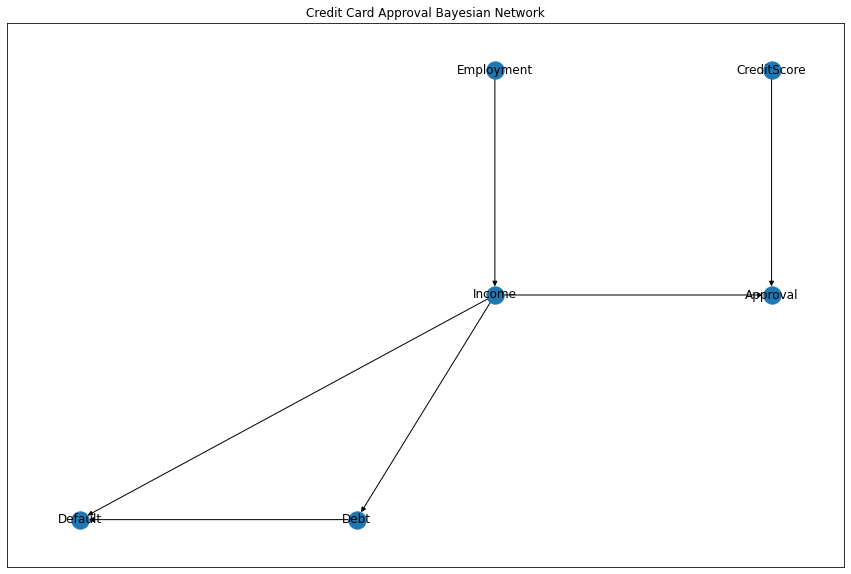

In [107]:
#Create a directed graph
card_approval_network=nx.DiGraph()
card_approval_network.add_node('Approval')
card_approval_network.add_node('Debt')
card_approval_network.add_node('Default')
card_approval_network.add_node('Employment')
card_approval_network.add_node('CreditScore')
card_approval_network.add_node('Income')
card_approval_network.add_edge('Employment', 'Income')
card_approval_network.add_edge('Income', 'Approval')
card_approval_network.add_edge('CreditScore', 'Approval')
card_approval_network.add_edge('Income', 'Debt')
card_approval_network.add_edge('Debt', 'Default')
card_approval_network.add_edge('Income', 'Default')

#Define positions for the nodes
pos = {
    "Approval": (8,8),
    "Debt": (5,6),
    "Default": (3,6),
    "Employment": (6,10),
    "CreditScore": (8,10),
    "Income": (6,8)
}

#Visusalise the graph
plt.figure(figsize=(15,10))
nx.draw_networkx(card_approval_network, pos)
plt.title('Credit Card Approval Bayesian Network')
plt.show()

### Implementation of the Bayesian Network

In [69]:
#Import libraries 
import numpy as np
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianNetwork

In [70]:
#Create the Bayesian Network as credit card 
credit_card = BayesianNetwork([("Employment", "Income"),
                               ("Income", "Approval"),
                               ("CreditScore", "Approval"),
                               ("Income", "Debt"),
                               ("Debt", "Default"),
                               ("Income","Default")
                              ])

#### Conditional probability distributions


In [71]:
# Employment CPD
cpd_employment = TabularCPD(
    variable='Employment', 
    variable_card=2, 
    values=[[0.8], #yes
            [0.2]]) #no

In [72]:
# Income CPD
cpd_income = TabularCPD(
    variable='Income', 
    variable_card= 2, 
    values=[[0.7, 0.3], #high
            [0.3, 0.7]], #low
    evidence=['Employment'], 
    evidence_card=[2])

In [73]:
# CreditScore CPD
cpd_credit_score = TabularCPD(
    variable='CreditScore', 
    variable_card=2, 
    values=[[0.7], #high
            [0.3]]) #low

In [74]:
# Approval CPD
cpd_approval = TabularCPD(
    variable='Approval', 
    variable_card=2, 
    values=[[0.9, 0.6, 0.6, 0.1], #yes
            [0.1, 0.4, 0.4, 0.9]], #no
    evidence=['Income', 'CreditScore'], 
    evidence_card=[2, 2])

In [88]:
# Default CPD
cpd_default = TabularCPD(
    variable='Default', 
    variable_card=2, 
    values=[[0.6, 0.1, 0.9, 0.2], #yes
            [0.4, 0.9, 0.1, 0.8]], #no
    evidence=['Income', 'Debt'], 
    evidence_card=[2, 2])

In [76]:
# Debt CPD
cpd_debt = TabularCPD(
    variable='Debt', 
    variable_card=2, 
    values=[[0.2, 0.7], #yes
            [0.8, 0.3]], #no
    evidence=['Income'], 
    evidence_card=[2])

In [89]:
# Add the CPDs to the network
credit_card.add_cpds(cpd_employment, cpd_income, cpd_credit_score, cpd_approval, cpd_default, cpd_debt)

In [90]:
# Check if CPDs were added correctly
credit_card.get_cpds()

[<TabularCPD representing P(Approval:2 | Income:2, CreditScore:2) at 0x7fedb8f14280>,
 <TabularCPD representing P(CreditScore:2) at 0x7fedb9039460>,
 <TabularCPD representing P(Employment:2) at 0x7fedb8f14460>,
 <TabularCPD representing P(Income:2 | Employment:2) at 0x7fedb8f14cd0>,
 <TabularCPD representing P(Default:2 | Income:2, Debt:2) at 0x7fedb8e9fdc0>,
 <TabularCPD representing P(Debt:2 | Income:2) at 0x7fedb8f14130>]

In [91]:
# Determine the nodes that are affected by 'CreditScore' 
credit_card.active_trail_nodes('CreditScore')

{'CreditScore': {'Approval', 'CreditScore'}}

In [92]:
# Determine the nodes that are affected by 'Approval' 
credit_card.active_trail_nodes('Approval')

{'Approval': {'Approval',
  'CreditScore',
  'Debt',
  'Default',
  'Employment',
  'Income'}}

In [93]:
# Determine the nodes that are affected by 'Approval' 
credit_card.active_trail_nodes('Default')

{'Default': {'Approval', 'Debt', 'Default', 'Employment', 'Income'}}

In [94]:
# Display an example of conditional probabilities 
print(credit_card.get_cpds('Income'))

+------------+---------------+---------------+
| Employment | Employment(0) | Employment(1) |
+------------+---------------+---------------+
| Income(0)  | 0.7           | 0.3           |
+------------+---------------+---------------+
| Income(1)  | 0.3           | 0.7           |
+------------+---------------+---------------+


In [95]:
# Retrieve the independencies of all nodes
credit_card.get_independencies()

(Income ⟂ CreditScore)
(Income ⟂ CreditScore | Employment)
(Income ⟂ CreditScore | Debt)
(Income ⟂ CreditScore | Default)
(Income ⟂ CreditScore | Debt, Employment)
(Income ⟂ CreditScore | Default, Employment)
(Income ⟂ CreditScore | Debt, Default)
(Income ⟂ CreditScore | Default, Debt, Employment)
(CreditScore ⟂ Income, Default, Debt, Employment)
(CreditScore ⟂ Employment, Debt, Default | Income)
(CreditScore ⟂ Income, Debt, Default | Employment)
(CreditScore ⟂ Income, Employment, Default | Debt)
(CreditScore ⟂ Income, Debt, Employment | Default)
(CreditScore ⟂ Debt, Default | Income, Employment)
(CreditScore ⟂ Employment, Default | Income, Debt)
(CreditScore ⟂ Employment, Debt, Default | Income, Approval)
(CreditScore ⟂ Debt, Employment | Income, Default)
(CreditScore ⟂ Income, Default | Debt, Employment)
(CreditScore ⟂ Income, Debt | Default, Employment)
(CreditScore ⟂ Income, Employment | Debt, Default)
(CreditScore ⟂ Default | Income, Debt, Employment)
(CreditScore ⟂ Debt, Default 

In [96]:
 def __init__(self, model):
    self.model = credit_card
    self.model.check_model()
    

### Querying the Bayesian Network

In [97]:
from pgmpy.inference import VariableElimination

In [98]:
# Initiate VariableElimination to infer probabilites
approval_infer=VariableElimination(credit_card)

#### Query 1: 
What is the probability that the credit card will get approved?

In [106]:
# Perform the query
prob_cc_approval = approval_infer.query(
    variables=['Approval'],
    joint=False)

# Print the result 
print(prob_cc_approval['Approval'])

+-------------+-----------------+
| Approval    |   phi(Approval) |
+=============+=================+
| Approval(0) |          0.6732 |
+-------------+-----------------+
| Approval(1) |          0.3268 |
+-------------+-----------------+


#### Query 2: 
What is the probability of getting a credit card approval when the applicant does not have a high income? 

In [105]:
# Perform the query
prob_cc_approval_lincome = approval_infer.query(
    variables = ['Approval'],
    joint = False,
    evidence = ({'Income' : 0})
)

# Print the result 
print(prob_cc_approval_lincome['Approval'])

+-------------+-----------------+
| Approval    |   phi(Approval) |
+=============+=================+
| Approval(0) |          0.8100 |
+-------------+-----------------+
| Approval(1) |          0.1900 |
+-------------+-----------------+


#### Query 3:
What is the probability that an applicant with a high credit score and a history of default gets credit card approval?

In [104]:
# Perform the query
prob_hcs_ydefault_approval = approval_infer.query(
    variables=['Approval'],
    joint=False,
    evidence={'CreditScore': 1, 'Default': 1}
)

# Print the result
print(prob_hcs_ydefault_approval['Approval'])

+-------------+-----------------+
| Approval    |   phi(Approval) |
+=============+=================+
| Approval(0) |          0.5040 |
+-------------+-----------------+
| Approval(1) |          0.4960 |
+-------------+-----------------+
